# Outliers
Some strange value in a data set is an outlier. for example 1, 2, 3, 4, 5, -100

here -100 is an outlier

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [6]:
# Load dataset
df = pd.read_csv("../data/clv_data.csv")
df.head()

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
0,0,0,NaN,Male,126895,14.0,San Francisco,0
1,1,1,NaN,Male,161474,14.0,Tokyo,0
2,2,2,24.0,Male,104723,34.0,London,1
3,3,3,29.0,Male,43791,28.0,London,2
4,4,4,18.0,Female,132181,26.0,London,2


# Box-plot

<Axes: ylabel='purchases'>

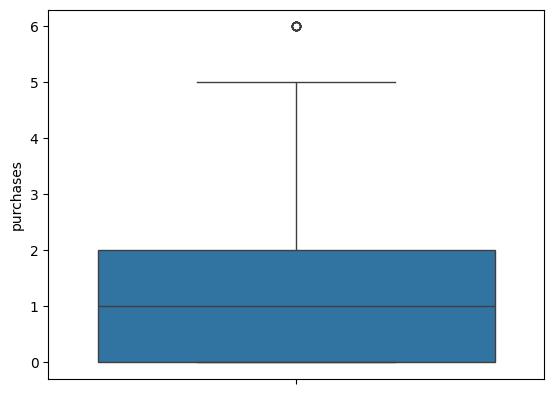

In [7]:
sns.boxplot(df['purchases'])

In [8]:
# function to detect outliers

def find_outliers(array):

    q1 = np.quantile(array, 0.25)
    q3 = np.quantile(array, 0.75)

    med = np.median(array)

    iqr = q3 -  q1


    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)

    outliers = array[(array <= lower) | (array >= upper)]
    print('Outliers within the box plot are :{}'.format(outliers))
    return outliers

find_outliers(df['purchases'])

Outliers within the box plot are :47      5
104     5
142     5
301     5
323     5
485     6
486     5
1026    5
1104    6
1112    5
1120    6
1125    5
1374    5
1504    5
1623    5
1669    6
1670    5
1809    6
1818    5
1836    5
1870    5
2180    5
2463    6
2548    5
2572    5
2605    5
2717    5
2901    5
3032    6
3080    5
3105    5
3162    5
3170    5
3291    5
3298    5
3321    5
3361    5
3380    5
3410    5
3566    5
3603    6
3631    6
3835    5
3848    5
4003    6
4141    5
4334    5
4346    5
4545    5
4597    5
4611    5
4620    5
4662    5
4691    5
4728    5
4751    5
4761    5
4895    5
4958    5
Name: purchases, dtype: int64


47      5
104     5
142     5
301     5
323     5
485     6
486     5
1026    5
1104    6
1112    5
1120    6
1125    5
1374    5
1504    5
1623    5
1669    6
1670    5
1809    6
1818    5
1836    5
1870    5
2180    5
2463    6
2548    5
2572    5
2605    5
2717    5
2901    5
3032    6
3080    5
3105    5
3162    5
3170    5
3291    5
3298    5
3321    5
3361    5
3380    5
3410    5
3566    5
3603    6
3631    6
3835    5
3848    5
4003    6
4141    5
4334    5
4346    5
4545    5
4597    5
4611    5
4620    5
4662    5
4691    5
4728    5
4751    5
4761    5
4895    5
4958    5
Name: purchases, dtype: int64

# Z-Scores

In [9]:
purchases = df['purchases']

def percentile_outliers(array,
                        lower_bound_perc,
                        upper_bound_perc):
    
    upper_bound = np.percentile(df['purchases'], upper_bound_perc)
    lower_bound = np.percentile(df['purchases'], lower_bound_perc)
    
    outliers = array[(array <= lower_bound) | (array >= upper_bound)]
    
    return outliers

def z_score_outliers(array,
                     z_score_lower,
                     z_score_upper):

    z_scores = scipy.stats.zscore(array)
    outliers = (z_scores > 1.96) | (z_scores < -1.96)
    
    return array[outliers]

In [10]:
outliers = percentile_outliers(df['purchases'],
               upper_bound_perc = 99,
               lower_bound_perc = 1)

In [11]:
z_score_outliers(df['purchases'],
                     z_score_lower = -1.96,
                     z_score_upper = 1.96)

28      4
47      5
51      4
67      4
74      4
       ..
4880    4
4895    5
4897    4
4944    4
4958    5
Name: purchases, Length: 227, dtype: int64

In [12]:
from sklearn.ensemble import IsolationForest

features = ['age','income','days_on_platform','purchases']

# drop 
df = df.dropna()

# split
X = df[features]

x_train = X[:4000]
xtest = X[1000:]

# fit model 

model = IsolationForest(n_estimators=50, max_samples=100)
model.fit(x_train)

## Get Scores
df['scores'] = model.decision_function(x_train)
df['anomaly'] = model.predict(X)

## Get Anomalies
outliers=df.loc[df['anomaly']==-1]

outliers

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases,scores,anomaly
4,4,4,18.0,Female,132181,26.0,London,2,-0.005117,-1
12,12,12,12.0,Male,130521,12.0,London,1,-0.014524,-1
15,15,15,31.0,Female,226249,20.0,Miami,0,-0.030010,-1
17,17,17,27.0,Female,177582,2.0,London,0,-0.040517,-1
18,18,18,10.0,Female,260,32.0,San Francisco,0,-0.046481,-1
...,...,...,...,...,...,...,...,...,...,...
4967,4967,4967,25.0,Male,73732,56.0,London,0,-0.001528,-1
4970,4970,4970,34.0,Female,9850,3.0,New York City,3,-0.047281,-1
4979,4979,4979,50.0,Male,90750,71.0,New York City,1,-0.096676,-1
4984,4984,4984,24.0,Female,225155,8.0,San Francisco,2,-0.062812,-1


# Outlier Treatment

In [13]:
# First try removing outliers

def z_score_removal(df, column, lower_z_score, upper_z_score):
    col_df = df[column]

    z_scores = scipy.stats.zscore(purchases)
    outliers = (z_scores > upper_z_score) | (z_scores < lower_z_score)
    return df[~outliers]



def percentile_removal(df, column, lower_bound_perc, upper_bound_perc):
    
    col_df = df[column]
    
    upper_bound = np.percentile(col_df, upper_bound_perc)
    lower_bound = np.percentile(col_df, lower_bound_perc)

    z_scores = scipy.stats.zscore(purchases)
    outliers = (z_scores > upper_bound) | (z_scores < lower_bound)
    return df[~outliers]

filtered_df = z_score_removal(df, 'purchases', -1.96, 1.96)
percentile_removal(df, 'purchases', lower_bound_perc = 1, upper_bound_perc = 99)

/tmp/ipykernel_12397/2300772530.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[~outliers]
/tmp/ipykernel_12397/2300772530.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[~outliers]


,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases,scores,anomaly
3,3,3,29.0,Male,43791,28.0,London,2,0.036615,1
4,4,4,18.0,Female,132181,26.0,London,2,-0.005117,-1
9,9,9,49.0,Female,76842,19.0,Tokyo,2,0.015529,1
23,23,23,10.0,Female,108804,5.0,Tokyo,2,-0.058018,-1
25,25,25,46.0,Female,112992,9.0,London,3,-0.033724,-1
...,...,...,...,...,...,...,...,...,...,...
4953,4953,4953,33.0,Male,90302,21.0,Tokyo,3,0.018074,1
4958,4958,4958,47.0,Female,79452,4.0,New York City,5,-0.105481,-1
4970,4970,4970,34.0,Female,9850,3.0,New York City,3,-0.047281,-1
4984,4984,4984,24.0,Female,225155,8.0,San Francisco,2,-0.062812,-1


# Winsorize

Dropping outliers is not always a solution. It is bad approach.  If you feel those rows are valuable, we can winsorize, also known as "capping" our outliers. Rather than keep the outlier value, if the value falls above a specific threshold, we can replace the outlier with that threshold value.

In [14]:
def winsorize(df, column, upper, lower):
    col_df = df[column]
    
    perc_upper = np.percentile(df[column],upper)
    perc_lower = np.percentile(df[column],lower)
    
    df[column] = np.where(df[column] >= perc_upper, 
                          perc_upper, 
                          df[column])
    
    df[column] = np.where(df[column] <= perc_lower, 
                          perc_lower, 
                          df[column])
    
    return df

In [15]:
winsorize(df, 'purchases', 97.5, 0.025)

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases,scores,anomaly
2,2,2,24.0,Male,104723,34.0,London,1.0,0.044113,1
3,3,3,29.0,Male,43791,28.0,London,2.0,0.036615,1
4,4,4,18.0,Female,132181,26.0,London,2.0,-0.005117,-1
5,5,5,23.0,Male,12315,14.0,New York City,0.0,0.031090,1
8,8,8,46.0,Male,129157,23.0,New York City,0.0,0.012881,1
...,...,...,...,...,...,...,...,...,...,...
4986,4986,4986,23.0,Male,75425,6.0,London,1.0,0.043802,1
4989,4989,4989,47.0,Female,84987,30.0,Tokyo,0.0,0.019823,1
4990,4990,4990,33.0,Male,3020,89.0,New York City,0.0,-0.101147,-1
4991,4991,4991,36.0,Female,26173,34.0,Tokyo,0.0,0.047052,1
